<a href="https://colab.research.google.com/github/Habib0308/University_Final_Year_Project/blob/master/Notebooks/Data_Analysis_Chicago_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Avoid colab clossing
```
function ClickConnect(){
    document.querySelector("colab-connect-button").click()
    console.log("Clicked on connect button"); 
}
setInterval(ClickConnect,60000)
```

# **Imports**

In [20]:
import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt

#**Import dataset**

In [21]:
url_2019_present="https://data.cityofchicago.org/api/views/x2n5-8w5q/rows.csv?accessType=DOWNLOAD"
url_2001_present="https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD"
df= pd.read_csv(url_2019_present, encoding = "utf-8")
df.head(3)

#df= pd.read_csv(url, encoding = "utf-8", nrows=1000) #taking less rows so i can easily preprocess

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JD163753,02/24/2020 08:15:00 PM,031XX W LEXINGTON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,N,N,1134,24.0,11,NaN,NaN,NaN,NaN,NaN
1,JD212847,04/10/2020 10:56:00 PM,005XX W 103RD ST,0560,ASSAULT,SIMPLE,RESIDENCE,N,N,2232,9.0,08A,1174583.0,1836593.0,41.707001,-87.636288,"(41.707000821, -87.636288063)"
2,JC320782,06/24/2019 06:20:00 PM,041XX S DREXEL BLVD,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),N,N,214,4.0,06,NaN,NaN,NaN,NaN,NaN


# **Basic information**

In [22]:
df.info()
print("Rows and Columns size: ", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234545 entries, 0 to 234544
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CASE#                   234545 non-null  object 
 1   DATE  OF OCCURRENCE     234545 non-null  object 
 2   BLOCK                   234545 non-null  object 
 3    IUCR                   234545 non-null  object 
 4    PRIMARY DESCRIPTION    234545 non-null  object 
 5    SECONDARY DESCRIPTION  234545 non-null  object 
 6    LOCATION DESCRIPTION   233522 non-null  object 
 7   ARREST                  234545 non-null  object 
 8   DOMESTIC                234545 non-null  object 
 9   BEAT                    234545 non-null  int64  
 10  WARD                    234534 non-null  float64
 11  FBI CD                  234545 non-null  object 
 12  X COORDINATE            233172 non-null  float64
 13  Y COORDINATE            233172 non-null  float64
 14  LATITUDE            

In [23]:
#df.describe(exclude='number').T.sort_values(by='unique')

# **Renaming columns for convenience**
1. replacing spaces with underscores
2. lowercase column names
3. renaming short names



In [24]:
df.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

**Replacing space with underscore**

In [25]:
df.columns= df.columns.str.replace(" ","_")

**Renaming columns with extra spaces**

In [26]:
df.rename(columns= {"DATE__OF_OCCURRENCE":"DATE_OF_OCCURRENCE", "_IUCR":"IUCR", "_PRIMARY_DESCRIPTION":"PRIMARY_DESCRIPTION", "_SECONDARY_DESCRIPTION":"SECONDARY_DESCRIPTION", "_LOCATION_DESCRIPTION":"LOCATION_DESCRIPTION"}, inplace= True)

**replacing small case**

In [27]:
df.columns= [x.lower() for x in df.columns]

In [28]:
df.columns

Index(['case#', 'date_of_occurrence', 'block', 'iucr', 'primary_description',
       'secondary_description', 'location_description', 'arrest', 'domestic',
       'beat', 'ward', 'fbi_cd', 'x_coordinate', 'y_coordinate', 'latitude',
       'longitude', 'location'],
      dtype='object')

# **Deleting extra columns**

In [29]:
del df["case#"] #Extra
del df["x_coordinate"]#not using it
del df["y_coordinate"]#not using it
del df["location"] #It's the combination of both the longitude and latitude

#**Droping NULL Values and duplicates**
dropping null

In [30]:
nullColumnWise= df.isnull().sum()  # Sum of Null in each column
trows= df.size                     # Total Rows
totalNull= nullColumnWise.sum()    # Total Null
print("Nulls Column Wise:")
print(nullColumnWise)
print("Total Null", totalNull)
print("Total Rows", trows)
print("Null Percentage:",totalNull/trows*100)
df.shape

Nulls Column Wise:
date_of_occurrence          0
block                       0
iucr                        0
primary_description         0
secondary_description       0
location_description     1023
arrest                      0
domestic                    0
beat                        0
ward                       11
fbi_cd                      0
latitude                 1373
longitude                1373
dtype: int64
Total Null 3780
Total Rows 3049085
Null Percentage: 0.12397161771482265


(234545, 13)

In [31]:
# Null percentage is very less so we can drop easily
df = df.dropna(how='any',axis=0)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

**Drop duplicates**

In [32]:
df=df.drop_duplicates()

# **Datetime**


[Datetime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior), [dateoffset](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)

In [33]:
df.loc[1,["date_of_occurrence"]]

date_of_occurrence    04/10/2020 10:56:00 PM
Name: 1, dtype: object

**Converting to datetime**

In [34]:
df["date_of_occurrence"] = pd.to_datetime(df["date_of_occurrence"], format="%m/%d/%Y %I:%M:%S %p")

**First date, last date, No of days available**

In [35]:
firstDay= df["date_of_occurrence"].min()
latestDate= df["date_of_occurrence"].max()
days= latestDate-firstDay
print("First Date (y/m/d) :", firstDay)
print("Latest Date(y/m/d) :", latestDate)
print("No of days between the first and latest date: ", days)

First Date (y/m/d) : 2019-06-21 05:05:00
Latest Date(y/m/d) : 2020-06-19 23:53:00
No of days between the first and latest date:  364 days 18:48:00


**Extracting Month, Year, Weekday, Hour**

In [36]:
df['month'] = df['date_of_occurrence'].dt.strftime('%b') #Month
df["week_day"]= df["date_of_occurrence"].dt.day_name() #Day Name
df['hour'] = pd.DatetimeIndex(df["date_of_occurrence"]).hour #24 Hour]
df['year'] = pd.DatetimeIndex(df["date_of_occurrence"]).year # Year

# **Setting and sorting Index**

In [37]:
df.set_index("date_of_occurrence", inplace=True)
df.sort_index(inplace=True)

# **Converting data types**

In [38]:
df.dtypes

block                     object
iucr                      object
primary_description       object
secondary_description     object
location_description      object
arrest                    object
domestic                  object
beat                       int64
ward                     float64
fbi_cd                    object
latitude                 float64
longitude                float64
month                     object
week_day                  object
hour                       int64
year                       int64
dtype: object

In [39]:
df["ward"]= df["ward"].astype(object)
df["beat"]= df["beat"].astype(object)
df["hour"]= df["hour"].astype(object)

In [40]:
df.dtypes

block                     object
iucr                      object
primary_description       object
secondary_description     object
location_description      object
arrest                    object
domestic                  object
beat                      object
ward                      object
fbi_cd                    object
latitude                 float64
longitude                float64
month                     object
week_day                  object
hour                      object
year                       int64
dtype: object

In [41]:
df.head(3)

,block,iucr,primary_description,secondary_description,location_description,arrest,domestic,beat,ward,fbi_cd,latitude,longitude,month,week_day,hour,year
date_of_occurrence,,,,,,,,,,,,,,,,
2019-06-21 05:05:00,034XX W FULTON BLVD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,N,Y,1123,28,07,41.886341,-87.712025,Jun,Friday,5,2019
2019-06-21 05:18:00,034XX N NEVA AVE,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,RESIDENCE,Y,N,1632,38,26,41.942106,-87.805654,Jun,Friday,5,2019
2019-06-21 05:30:00,083XX S STONY ISLAND AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,N,Y,412,8,08B,41.743548,-87.585791,Jun,Friday,5,2019


# **Data Analysis** 

*	**Purpose is to check frequency of categories so that I can use for One hot encoding with multiple categories**

**Finding the top frequencies**

* Frequently comitted crimes
* Wards with most crimes frequency
* Locations with frequent crimes
* Frequent FBI Codes
* IUCR codes frequently repeated 
* Which are top 10 secondary description crimes for each primmary description crime

**Basic analysis**

*	An overview of frequency of crimes across all wards
* Which ward has which frequent crime
* Which month which crimes happen frequently
*	which weekdays the most frequent crimes happens?
*	which hour the most frequent crime happens?


# **Finding Top Frequencies**

## **Top frequently committed crimes?**

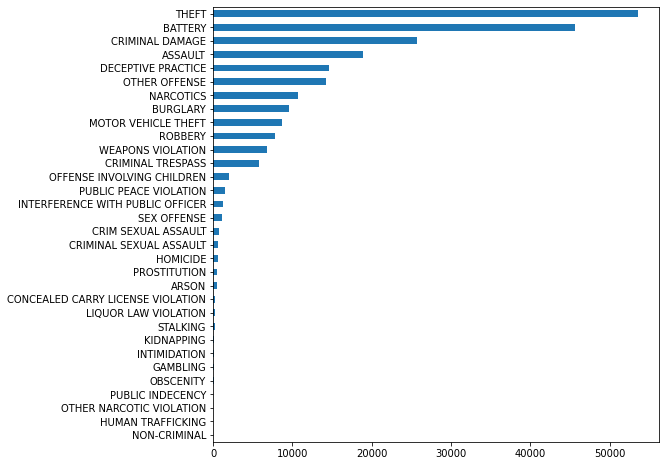

In [42]:
df["primary_description"].value_counts(ascending=True).plot(kind="barh", figsize=(8,8))
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

The crimes frequency drops from high to low like most of the data comprises of top 10 crimes Getting the top 10 crimes will be better

## **Which wards have most crimes?**

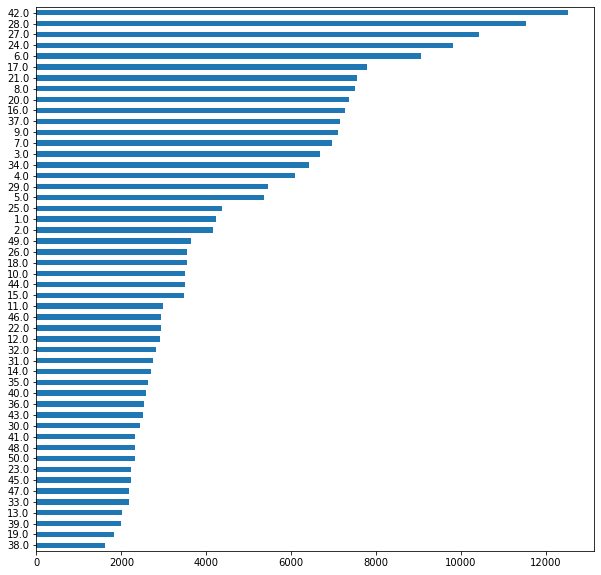

In [43]:
df["ward"].value_counts(sort= True, ascending=True).head(60).plot(figsize=(10,10), kind="barh")

Trainning top 30 wards would be a good choice

## **which locations have frequent crimes?**

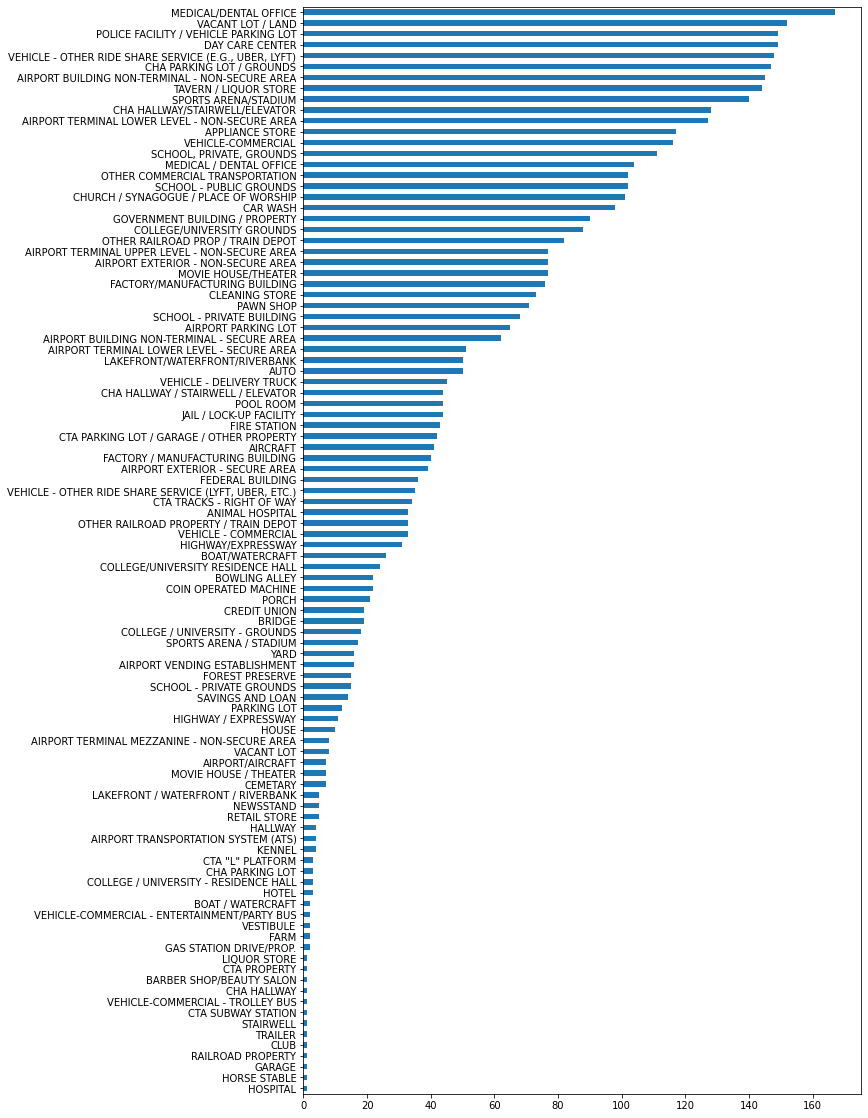

In [44]:
df["location_description"].value_counts(sort= True, ascending=True).head(100).plot(figsize=(10,20), kind="barh")

picking top 30 would be better than 10

## **Frequent FBI codes**

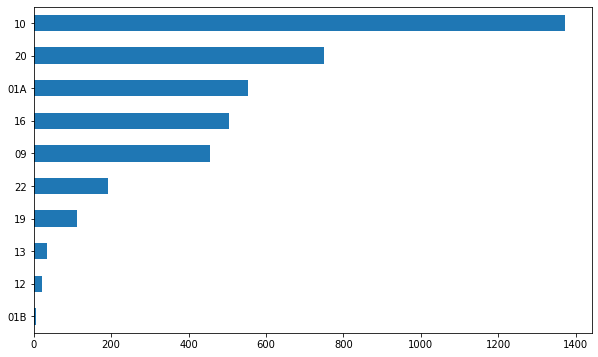

In [45]:
df["fbi_cd"].value_counts(sort= True, ascending=True).head(10).plot(figsize=(10,6), kind="barh")

I'll take top 10

## **Which iucr code is frequently repeated?**

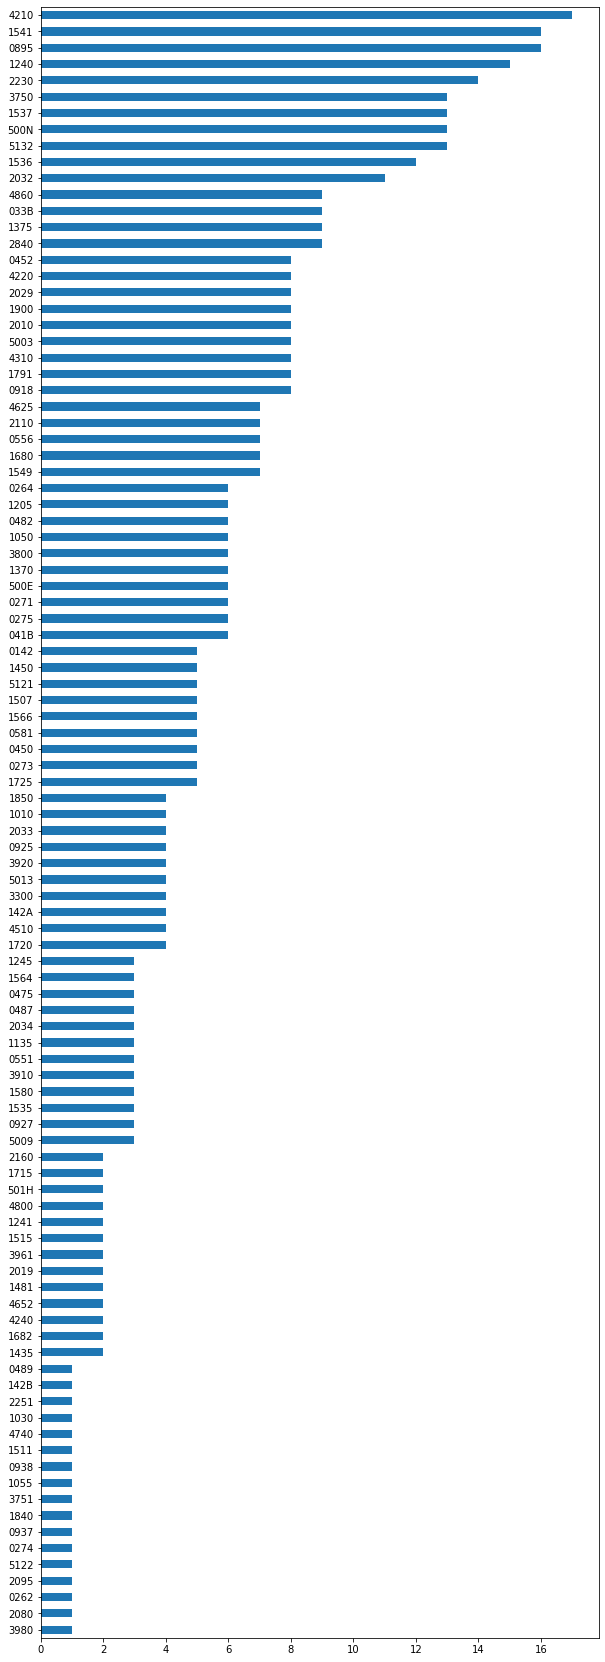

In [46]:
df["iucr"].value_counts(sort= True, ascending=True).head(100).plot(figsize=(10,30), kind="barh")

## **For the top primary description which are top 10 secondary description crimes?**

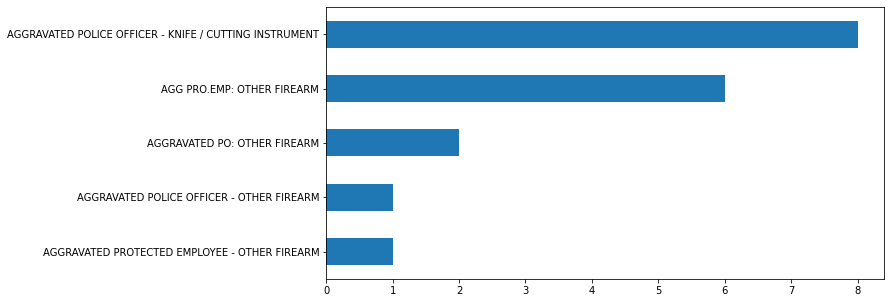

In [47]:
crime_type="ASSAULT"
top= 5
groupPrim_Desc= df.groupby(["primary_description"], sort=True)
groupPrim_Desc.get_group(crime_type)["secondary_description"].value_counts(ascending=True).head(top).plot(figsize=(10,5), kind="barh")

# **Some Other Data analysis**

## **All wards with Most crimes (An overview)**

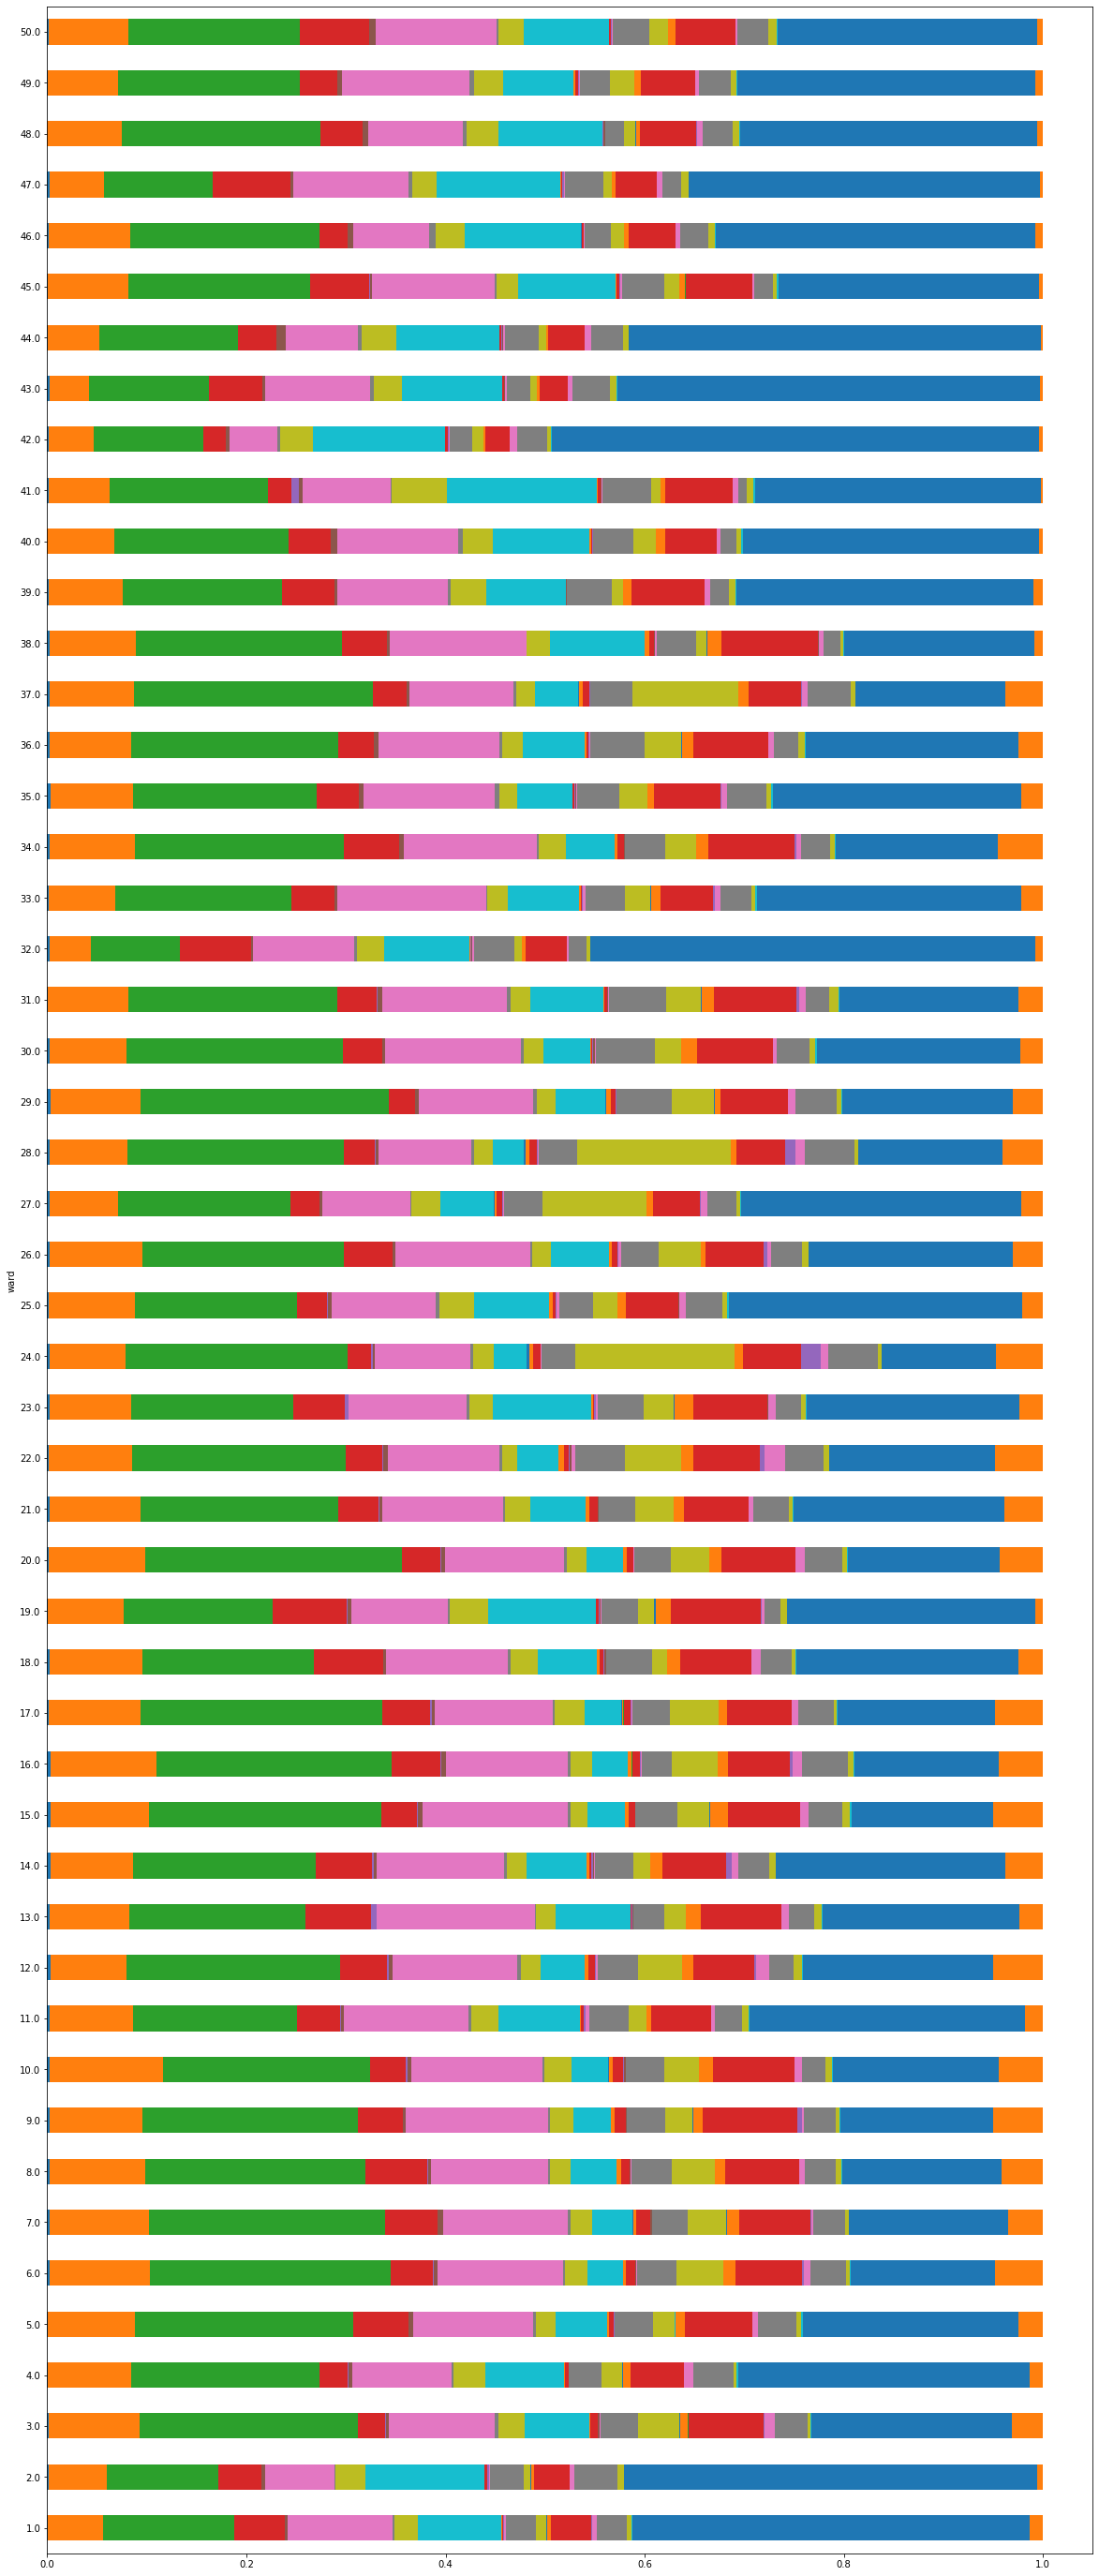

In [48]:
groupPrim_Desc= df.groupby(["ward"], sort=True)
groupPrim_Desc["primary_description"].value_counts(ascending=True, normalize=True).unstack().plot(figsize=(20,50), kind="barh", legend=False, stacked=True, sort_columns=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f89146bc2b0>,
      dtype=object)

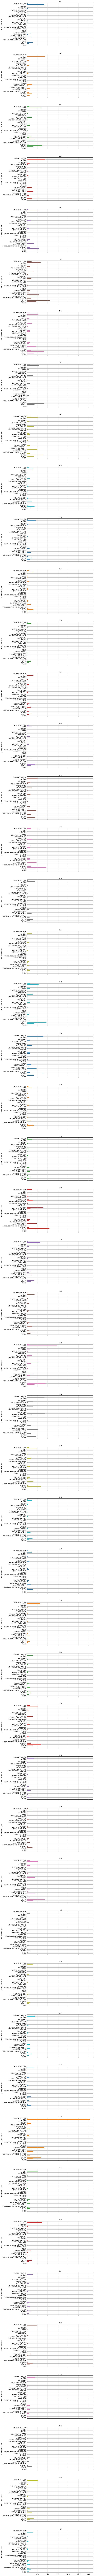

In [49]:
groupPrim_Desc= df.groupby(["primary_description"], sort=True)
groupPrim_Desc["ward"].value_counts().unstack().plot(figsize=(10,400), kind="barh", legend=False, subplots=True, grid=True)

## **Which ward has which frequent crimes being committed?**

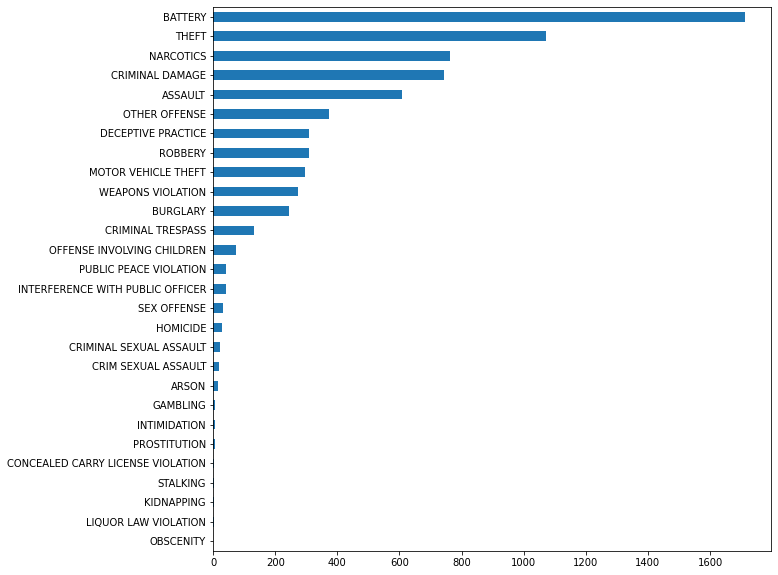

In [50]:
ward_no=37
groupPrim_Desc= df.groupby(["ward"], sort=True)
groupPrim_Desc.get_group(ward_no)["primary_description"].value_counts(sort= True, ascending=True).plot(figsize=(10,10), kind="barh")  #.unstack().head(25).plot(figsize=(200,10), kind="bar")

## **Which months which crime happens frequently?**

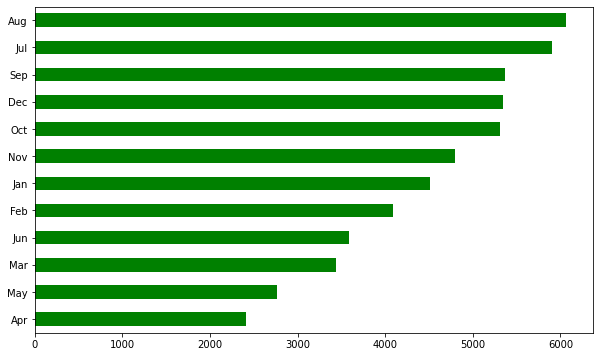

In [51]:
crime_type="THEFT"
groupPrim_Desc= df.groupby(["primary_description"], sort=True)
groupPrim_Desc.get_group(crime_type)["month"].value_counts(sort= True, ascending=True).plot(figsize=(10,6), color="g", kind="barh")

## **which weekdays the most frequent crime happens?**

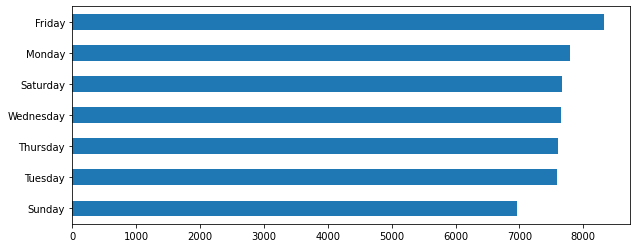

In [52]:
groupPrim_Desc.get_group(crime_type)["week_day"].value_counts(sort= True, ascending=True).plot(figsize=(10,4), kind="barh")  #.unstack().head(25).plot(figsize=(200,10), kind="bar")

## **which hour the most frequent crime happens?**

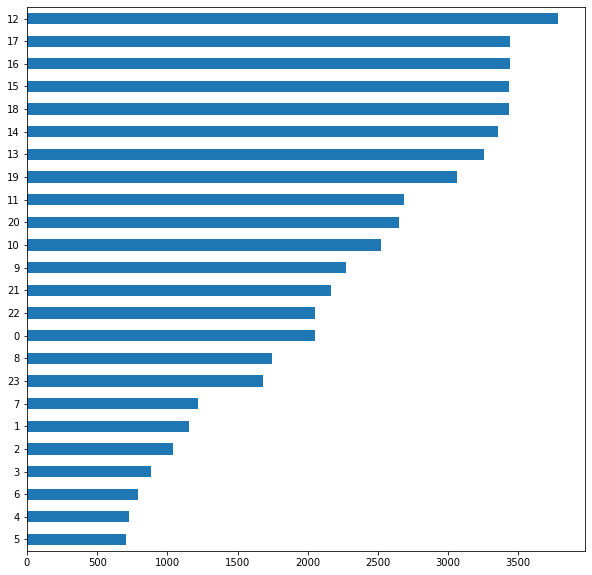

In [53]:
groupPrim_Desc.get_group(crime_type)["hour"].value_counts(sort= True, ascending=True).plot(figsize=(10,10), kind="barh")  #.unstack().head(25).plot(figsize=(200,10), kind="bar")

# **Saving Dataset**

In [54]:
df.to_csv("dataset_analyzed.csv")